# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [6]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [7]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [8]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [9]:
# Mean of all salaries
round(df['salary'].mean())

113706

In [10]:
# Median of all salaries
df['salary'].median()

107300.0

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [11]:
sex_salary = df[['sex', 'salary']]

In [12]:
sex_salary.head(10)

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
5,Male,97000
6,Male,175000
7,Male,147765
8,Male,119250
9,Female,129000


In [13]:
sex_salary.tail(10)

,sex,salary
387,Male,109305
388,Male,119450
389,Male,186023
390,Male,166605
391,Male,151292
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329
396,Male,81035


Finding the Median salary for all males

In [14]:
male_salary = round(sex_salary.query("sex=='Male'")['salary'].median())


In [15]:
print("The median salary for male profesor is " + str(male_salary))

The median salary for male profesor is 108043


Finding the Median salary for all females

In [16]:
female_salary = round(sex_salary.query("sex == 'Female'")['salary'].median())

In [17]:
print("The median salary for male profesor is " + str(female_salary))

The median salary for male profesor is 103750


Comparing the Mean salary of Males and Females

In [18]:
sex_salary.groupby(['sex'])['salary'].median() 

sex
Female    103750
Male      108043
Name: salary, dtype: int64

In [19]:
# The difference between mean salaries of male and female
diff_salary = male_salary - female_salary

In [20]:
print("The difference between male professors and female profesors salaries is " + str(diff_salary))

The difference between male professors and female profesors salaries is 4293


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [21]:
over_20 = df[df['yrs.service']>=20]
over_20.head(10)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
6,7,Prof,B,30,23,Male,175000
7,8,Prof,B,45,45,Male,147765
8,9,Prof,B,21,20,Male,119250
16,17,Prof,B,19,20,Male,101000
17,18,Prof,A,38,34,Male,103450
18,19,Prof,A,37,23,Male,124750
19,20,Prof,A,39,36,Female,137000
20,21,Prof,A,31,26,Male,89565


In [22]:
over_20['yrs.service'].count()

157

In [23]:
round(over_20['salary'].mean(),2)

122520.66

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [24]:
under_20 = df[df['yrs.service']<20]
under_20.head(10)

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
5,6,AssocProf,B,6,6,Male,97000
9,10,Prof,B,18,18,Female,129000
10,11,AssocProf,B,12,8,Male,119800
11,12,AsstProf,B,7,2,Male,79800
12,13,AsstProf,B,1,1,Male,77700
13,14,AsstProf,B,2,0,Male,78000
14,15,Prof,B,20,18,Male,104800


In [25]:
under_20['yrs.service'].count()

240

In [26]:
round(under_20['salary'].mean(),2)

107940.5

In [27]:
round(over_20['salary'].describe())

count       157.0
mean     122521.0
std       29675.0
min       57800.0
25%      101036.0
50%      119450.0
75%      142500.0
max      231545.0
Name: salary, dtype: float64

In [28]:
round(under_20['salary'].describe())

count       240.0
mean     107941.0
std       29341.0
min       63100.0
25%       84435.0
50%      103725.0
75%      124412.0
max      204000.0
Name: salary, dtype: float64

Statistically speaking professors with 20 years or more of service in general earned higher salaries than those with less that 20 years of service. They have higher median salary, mean salary, and maximum and salary while those professors with less than 20 years of service have a higher minimum salary

People who have salary of greater than or equal to 200,000

In [29]:
over_200_K = df[df['salary'] > 200000]

In [30]:
round(over_200_K.describe())

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,3.0,3.0,3.0,3.0
mean,220.0,37.0,29.0,213682.0
std,163.0,7.0,20.0,15488.0
min,44.0,29.0,7.0,204000.0
25%,147.0,34.0,22.0,204750.0
50%,250.0,38.0,38.0,205500.0
75%,308.0,40.0,40.0,218522.0
max,365.0,43.0,43.0,231545.0


Your Findings here...


# Rename values, subset columns, etc

In [31]:
df.rename({'rank': 'Rank', 'discipline': 'Discipline','sex': 'Gender', 
          'salary': 'Salary' }, axis=1, inplace=True)

In [32]:
df

,Unnamed: 0,Rank,Discipline,yrs.since.phd,yrs.service,Gender,Salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

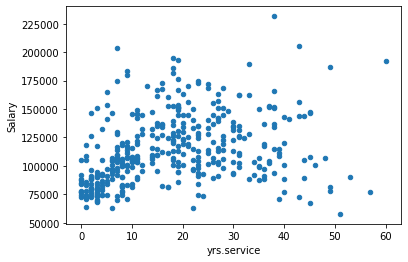

In [33]:
df.plot(kind = 'scatter', x = 'yrs.service', y = 'Salary')

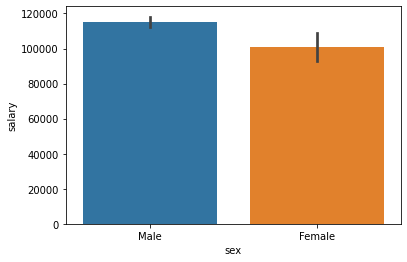

In [38]:
sns.barplot(x="sex", y="salary", data=sex_salary)

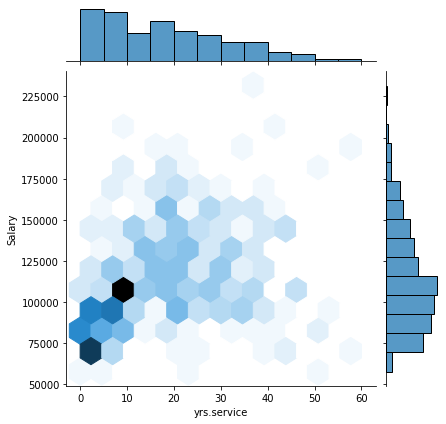

In [39]:
sns.jointplot(x='yrs.service', y = 'Salary', data=df, kind ='hex')


In [36]:
sex_salary

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


Your observations from the visuals: 

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

My conclusion is that male college professors earn more money than female professor and in this university higher pay comes with more experience since the mean and median paid is higher for falulty with over 20 years of experience.



